In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print("done")

done


# https://www.kaggle.com/datasets/saidaitali/startups-expansion

In [2]:
#some colors!
b = "\033[34m"
bl = "\033[0m"
r = "\033[31m"
rd = "\033[0m"
p = "\033[35m"
pl = "\033[0m"

In [3]:
df = pd.read_excel(r"C:\Users\Admin\Desktop\project\archive (2)\startup-expansion.xlsx")
df.head()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887


In [4]:
df.info()
#null values/dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [5]:
df.describe().round(2)

,Store ID,Marketing Spend,Revenue
count,150.00,150.00,150.00
mean,75.50,2893.15,39301.43
std,43.45,367.86,15465.75
min,1.00,1811.00,15562.00
25%,38.25,2662.25,21113.50
50%,75.50,2898.00,42993.00
75%,112.75,3111.50,51145.50
max,150.00,3984.00,68828.00


In [6]:
total_revenue = df['Revenue'].sum()
total_spent = df['Marketing Spend'].sum()
roi = (total_revenue - total_spent) / total_spent

In [7]:
    print(b+'unique states is :' + bl,df['State'].nunique())
    print(b+'unique Cities is :'+bl,len(df['City'].unique()))
    print(b+'unique Sales Regions is :'+bl,len(df['Sales Region'].unique()))
    print(b+'unique New Expansion​s is :'+bl,len(df['New Expansion'].unique()))
    print(b+'unique Stores ID is :'+bl,len(df['Store ID'].unique()))# stores id is unique, no douplicates found.
    print(p+'the sum of Marketing Spend is:'+pl,total_spent)
    print(p+'the sum of Revenue is:'+pl,total_revenue)
    print(r+'For every dollar spent on the marketing campaign $'+rd,round(roi, 2),r+ ' is earned.'+rd)


unique states is : 35
unique Cities is : 149
unique Sales Regions is : 2
unique New Expansion​s is : 2
unique Stores ID is : 150
the sum of Marketing Spend is: 433972
the sum of Revenue is: 5895215
For every dollar spent on the marketing campaign $ 12.58  is earned.


In [8]:
df['Sales Region'].value_counts()
# we have two regions: reagion 1 aaccounts for 64 and regon 2 accounts for 86 store.

Sales Region
Region 2    86
Region 1    64
Name: count, dtype: int64

In [9]:
df['City'].value_counts()
#data shows that we have only one city repeted twice (Rochester) and the rest is unique.

City
Rochester        2
Killeen          1
Wichita Falls    1
Naperville       1
Clovis           1
                ..
Akron            1
Fullerton        1
Manchester       1
Everett          1
Thousand Oaks    1
Name: count, Length: 149, dtype: int64

In [10]:
df['State'].value_counts()
#most of stores are located in california state with 40 store.

State
California        40
Texas             17
Florida           12
Washington         7
Colorado           5
Illinois           5
Georgia            4
Alabama            4
Connecticut        4
New Jersey         4
Arizona            3
Tennessee          3
Iowa               3
Michigan           3
South Carolina     3
Utah               3
Massachusetts      3
Kansas             3
New York           3
Louisiana          2
North Carolina     2
Ohio               2
Virginia           2
Oregon             2
Mississippi        1
New Mexico         1
Arkansas           1
New Hampshire      1
Oklahoma           1
Montana            1
Indiana            1
South Dakota       1
Minnesota          1
Wisconsin          1
Rhode Island       1
Name: count, dtype: int64

In [11]:
df['New Expansion'].value_counts()
#we have 10 New Expansions

New Expansion
Old    140
New     10
Name: count, dtype: int64

In [12]:
df.isna().sum()
#no missing data

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
dtype: int64

In [13]:
df.duplicated().sum()
# no douplicated data

0

# Analysis Stage:

In [14]:
df.head()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887


<AxesSubplot:xlabel='Sales Region'>

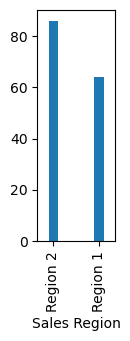

In [15]:
df['Sales Region'].value_counts().plot.bar(figsize=(1,3),width=0.2)
#showing that the region 1 has more stores than region 1 

In [16]:
reg_1 = df[df['Sales Region']=='Region 2']
reg_2 = df[df['Sales Region']=='Region 1']


total_revenue_r1 = reg_1['Revenue'].sum()
total_revenue_r2 = reg_2['Revenue'].sum()

total_spent_r1 = reg_1['Marketing Spend'].sum()
total_spent_r2 = reg_2['Marketing Spend'].sum()

roi_r1 = (total_revenue_r1 - total_spent_r1) / total_spent_r1
roi_r2 = (total_revenue_r2 - total_spent_r2) / total_spent_r2

print(b+"Roi for Region 1"+bl,roi_r1.round(2),"$")
print(p+"Roi for Region 2"+pl,roi_r2.round(2),"$")

Roi for Region 1 12.24 $
Roi for Region 2 13.04 $


In [17]:
print(p+'Region 2'+pl ,'is making higher Roi or profit than ',b+'Region 1'+bl,'by difference of :'
      ,(roi_r2-roi_r1).round(2),"$")

Region 2 is making higher Roi or profit than  Region 1 by difference of : 0.8 $


In [18]:
grouped_r1 = reg_1.groupby(['State','New Expansion'])[['Revenue', 'Marketing Spend']].sum()
grouped_r1 = grouped_r1.assign(Roi =
((grouped_r1['Revenue'] - grouped_r1['Marketing Spend'])/grouped_r1['Marketing Spend']).round(2))
print('Roi by state for', b+'Region 1'+bl)
grouped_r1.nlargest(5,'Roi')


Roi by state for Region 1


Revenue  Marketing Spend    Roi
State      New Expansion                                 
Arkansas   Old              68828             2440  27.21
California New             141883             7739  17.33
Arizona    Old              82257             4761  16.28
           New              48954             2911  15.82
Tennessee  Old              97049             5863  15.55

In [19]:
grouped_r2 = reg_2.groupby(['State','New Expansion'])[['Revenue', 'Marketing Spend']].sum()
grouped_r2 = grouped_r2.assign(Roi =
((grouped_r2['Revenue'] - grouped_r2['Marketing Spend'])/grouped_r2['Marketing Spend']).round(2))
print('Roi by state for', p+'Region 2'+pl)
grouped_r2.nlargest(5,'Roi')

Roi by state for Region 2


,,Revenue,Marketing Spend,Roi
State,New Expansion,,,
Rhode Island,Old,62337,3191,18.54
New York,Old,160046,8437,17.97
Michigan,Old,147759,7901,17.70
Ohio,Old,92390,5143,16.96
Alabama,Old,221025,12570,16.58


In [20]:
df['State'].value_counts()

State
California        40
Texas             17
Florida           12
Washington         7
Colorado           5
Illinois           5
Georgia            4
Alabama            4
Connecticut        4
New Jersey         4
Arizona            3
Tennessee          3
Iowa               3
Michigan           3
South Carolina     3
Utah               3
Massachusetts      3
Kansas             3
New York           3
Louisiana          2
North Carolina     2
Ohio               2
Virginia           2
Oregon             2
Mississippi        1
New Mexico         1
Arkansas           1
New Hampshire      1
Oklahoma           1
Montana            1
Indiana            1
South Dakota       1
Minnesota          1
Wisconsin          1
Rhode Island       1
Name: count, dtype: int64

In [21]:
city_data = df[df['State'] == 'California']
value_counts = city_data['New Expansion']
value_counts.value_counts()

New Expansion
Old    37
New     3
Name: count, dtype: int64

In [22]:
city_data = df[df['State'] == 'Arkansas']
value_counts = city_data['New Expansion']
value_counts.value_counts()

New Expansion
Old    1
Name: count, dtype: int64

In [23]:
city_data = df[df['State'] == 'Rhode Island']
value_counts = city_data['New Expansion']
value_counts.value_counts()

New Expansion
Old    1
Name: count, dtype: int64

In [24]:
city_data = df[df['State'] == 'New York']
value_counts = city_data['New Expansion']
value_counts.value_counts()

New Expansion
Old    3
Name: count, dtype: int64

Based on the data analyzed, the best four States to expand in terms of return on investment
(ROI) by region are Little Rock (Arkansas) and Oxnard (California) in region 1, and Grand Rapids
(Michigan) and Port St. Lucie (Florida) in region 2. Little Rock and Oxnard have the highest ROI 
among all the cities in the analysis, with 27.21 and 26.74, respectively. Grand Rapids and Port 
St. Lucie have a lower ROI, but are still strong contenders in their respective regions, with ROI 
of 22.32 and 22.05, respectively. 

In [25]:
reg_1.loc[:, "Roi"] = ((reg_1.Revenue - reg_1['Marketing Spend']) / reg_1['Marketing Spend']).round(2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10364\2862639454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_1.loc[:, "Roi"] = ((reg_1.Revenue - reg_1['Marketing Spend']) / reg_1['Marketing Spend']).round(2)


In [26]:
reg_2.loc[:, "Roi"] = ((reg_2.Revenue - reg_2['Marketing Spend']) / reg_2['Marketing Spend']).round(2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10364\1870295582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_2.loc[:, "Roi"] = ((reg_2.Revenue - reg_2['Marketing Spend']) / reg_2['Marketing Spend']).round(2)


In [27]:
print(b+'Region 1'+bl)
reg_1.nlargest(5,'Roi')

Region 1


,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Roi
63,64,Little Rock,Arkansas,Region 2,Old,2440,68828,27.21
37,38,Oxnard,California,Region 2,Old,2318,64302,26.74
102,103,Visalia,California,Region 2,Old,2104,45632,20.69
118,119,Huntington Beach,California,Region 2,Old,2527,54145,20.43
144,145,Glendale,California,Region 2,New,2363,49376,19.90


In [28]:
print(p+'Region 2'+pl)
reg_2.nlargest(5,'Roi')

Region 2


,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Roi
31,32,Grand Rapids,Michigan,Region 1,Old,2808,65475,22.32
25,26,Port St. Lucie,Florida,Region 1,Old,2420,55790,22.05
8,9,Worcester,Massachusetts,Region 1,Old,2675,59840,21.37
9,10,Rochester,New York,Region 1,Old,2984,64906,20.75
50,51,Akron,Ohio,Region 1,Old,2338,50364,20.54


Based on the ROI analysis, our top four recommended locations for expansion are Store ID 64 in Arkansas with an ROI of 27.21 and one previous expansion, Rhode Island with an ROI of 18.54 and one previous expansion, New York with an ROI of 17.97 and three previous expansions, and the newly opened store in California with an ROI of 17.33 and three new expansions, in addition to its 37 previous expansions. These locations have the potential to generate higher ROI for businesses expanding in these areas.

In [33]:
states_1 = ['California', 'Arkansas']
filter_1 = reg_1['State'].isin(states_1)
filtered_df = reg_1.loc[filter_1, ['Store ID','City','Sales Region','New Expansion','State','Marketing Spend','Revenue','Roi']]
filtered_df.sort_values('New Expansion')

,Store ID,City,Sales Region,New Expansion,State,Marketing Spend,Revenue,Roi
149,150,Thousand Oaks,Region 2,New,California,2431,40141,15.51
144,145,Glendale,Region 2,New,California,2363,49376,19.90
143,144,Rancho Cucamonga,Region 2,New,California,2945,52366,16.78
137,138,Norwalk,Region 2,Old,California,3112,19703,5.33
65,66,Santa Clara,Region 2,Old,California,2462,29008,10.78
66,67,Oceanside,Region 2,Old,California,3084,55684,17.06
71,72,Ontario,Region 2,Old,California,3168,52078,15.44
79,80,Costa Mesa,Region 2,Old,California,2275,41361,17.18
80,81,Garden Grove,Region 2,Old,California,3285,57530,16.51
88,89,Vista,Region 2,Old,California,2718,20949,6.71


In [30]:
states = ['New York', 'Florida']
filter_ = reg_2['State'].isin(states)
filtered_df = reg_2.loc[filter_, ['Store ID','City','Sales Region','New Expansion','State','Marketing Spend','Revenue','Roi']]
filtered_df.sort_values('State')

,Store ID,City,Sales Region,New Expansion,State,Marketing Spend,Revenue,Roi
16,17,Tallahassee,Region 1,Old,Florida,2737,47729,16.44
25,26,Port St. Lucie,Region 1,Old,Florida,2420,55790,22.05
38,39,Miramar,Region 1,Old,Florida,3488,49506,13.19
39,40,Cape Coral,Region 1,Old,Florida,2886,52250,17.10
67,68,Davie,Region 1,Old,Florida,3177,45418,13.30
68,69,Lakeland,Region 1,Old,Florida,3003,18297,5.09
72,73,Palm Bay,Region 1,Old,Florida,2943,25321,7.60
81,82,Fort Lauderdale,Region 1,Old,Florida,3217,54768,16.02
94,95,Gainesville,Region 1,Old,Florida,2990,48933,15.37
101,102,Coral Springs,Region 1,Old,Florida,3079,41319,12.42


In [34]:
df['Roi']=((df.Revenue - df['Marketing Spend']) / df['Marketing Spend']).round(2)
df['ROAS']=((df.Revenue /df['Marketing Spend']) *100).round(2)
df['Net profit']=(df.Revenue - df['Marketing Spend']).round(2)
df.nlargest(6,'Roi')

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Roi,ROAS,Net profit
63,64,Little Rock,Arkansas,Region 2,Old,2440,68828,27.21,2820.82,66388
37,38,Oxnard,California,Region 2,Old,2318,64302,26.74,2774.03,61984
31,32,Grand Rapids,Michigan,Region 1,Old,2808,65475,22.32,2331.73,62667
25,26,Port St. Lucie,Florida,Region 1,Old,2420,55790,22.05,2305.37,53370
8,9,Worcester,Massachusetts,Region 1,Old,2675,59840,21.37,2237.01,57165
9,10,Rochester,New York,Region 1,Old,2984,64906,20.75,2175.13,61922


In [32]:
df.to_excel('C:\\Users\\\Admin\\Desktop\\project\\archive (2)\\startup_expa_done.xlsx')